In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import os
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator #generate labels for the images    
from tensorflow.keras import layers, models


In [2]:
batch_size = 10
img_height = 200
img_width = 200

In [3]:
IMAGE_SIZE=256
BATCH_SIZE=32

In [4]:
images_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "C:\\Users\\ASUS\\OneDrive\\Documents\\Tomato\\Tomato Data set",
    shuffle=True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size= BATCH_SIZE,
)

Found 125 files belonging to 2 classes.


In [5]:
class_names=images_dataset.class_names
class_names

['Healthy', 'Unhealthy']

In [6]:
from keras.preprocessing.image import ImageDataGenerator


train = ImageDataGenerator(rescale= 1/255)
validation = ImageDataGenerator(rescale= 1/255)
test = ImageDataGenerator(rescale = 1/255)

In [7]:
train_dataset = train.flow_from_directory("C:\\Users\\ASUS\\OneDrive\\Documents\\Tomato\\Tomato Data set\\Healthy", target_size= (200,200), batch_size = 3,
                                           class_mode ="binary")
 
validation_dataset = validation.flow_from_directory("C:\\Users\\ASUS\\OneDrive\\Documents\\Tomato\\Tomato Data set\\Unhealthy", target_size= (200,200), batch_size = 3,
                                           class_mode ="binary")
   

Found 42 images belonging to 3 classes.
Found 83 images belonging to 5 classes.


In [8]:
train_dataset.class_indices
train_dataset.classes


array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2])

In [9]:
import tensorflow as tf
def get_dataset_partitions_tf(ds,train_split=0.7, val_split=0.1, test_split=0.2, shuffle=True, shuffle_size=1000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size, seed=10)
        
        train_size= int(train_split* ds_size)
        val_size= int(val_split* ds_size)
        
        train_ds=ds.take(train_size)
        
        val_ds= ds.skip(train_size).take(val_size)
        
        test_ds= ds.skip(train_size + val_size)
        
        return train_ds, val_ds, test_ds
    

In [10]:
images_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
from keras.layers import RandomFlip, RandomRotation, RandomZoom
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal_and_vertical'),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.1)
])

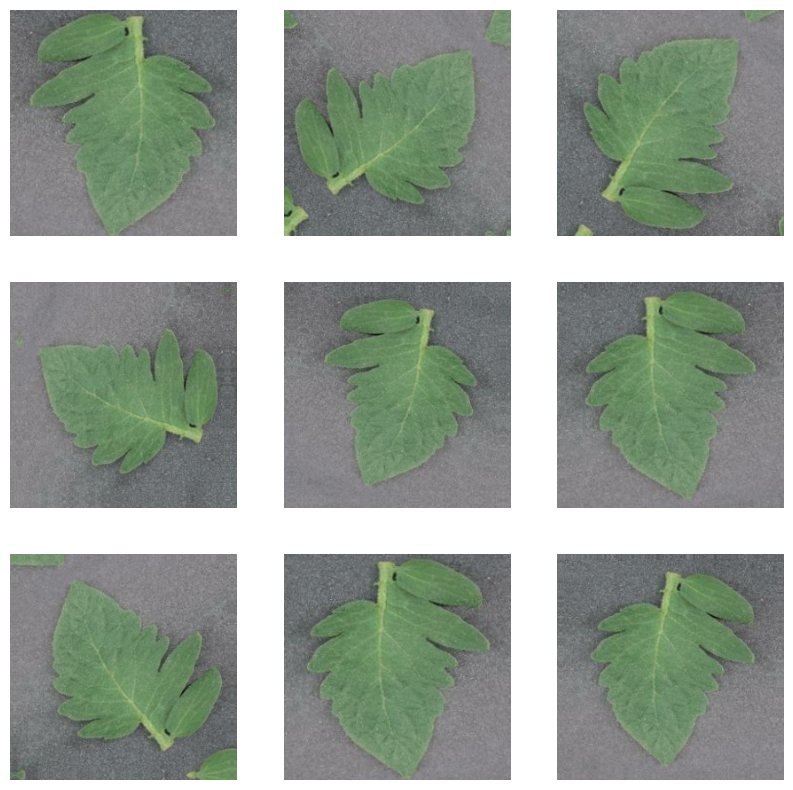

In [12]:
plt.figure(figsize=(10, 10))
#Image after applying data augmentation
for images, _ in images_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [13]:
# cnn
num_classes = len(class_names)

model_1 = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

In [14]:
model_1.compile(optimizer='RMSprop',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [15]:
model_1.build(input_shape=(10,200,200,3))
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, None, None, 3)     0         
                                                                 
 rescaling (Rescaling)       (10, 200, 200, 3)         0         
                                                                 
 conv2d (Conv2D)             (10, 200, 200, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (10, 100, 100, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (10, 100, 100, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (10, 50, 50, 32)          0         
 g2D)                                                 

In [16]:
model_1.compile(loss = 'binary_crossentropy',
             optimizer =tf.keras.optimizers.Adadelta(),
             metrics = ['accuracy'] )

In [17]:
history = model_1.fit(train_dataset,
                     steps_per_epoch= 3,
                     epochs = 80,
                     validation_data= validation_dataset)

Epoch 1/80


3/3 [==============================] - 7s 1s/step - loss: 0.6932 - accuracy: 0.1111 - val_loss: 0.6933 - val_accuracy: 0.1928
Epoch 2/80
3/3 [==============================] - 3s 1s/step - loss: 0.6932 - accuracy: 0.1111 - val_loss: 0.6932 - val_accuracy: 0.1687
Epoch 3/80
3/3 [==============================] - 3s 1s/step - loss: 0.6931 - accuracy: 0.5556 - val_loss: 0.6930 - val_accuracy: 0.1928
Epoch 4/80
3/3 [==============================] - 3s 1s/step - loss: 0.6931 - accuracy: 0.7778 - val_loss: 0.6929 - val_accuracy: 0.1928
Epoch 5/80
3/3 [==============================] - 3s 1s/step - loss: 0.6931 - accuracy: 0.4444 - val_loss: 0.6928 - val_accuracy: 0.1928
Epoch 6/80
3/3 [==============================] - 2s 1s/step - loss: 0.6930 - accuracy: 0.4444 - val_loss: 0.6926 - val_accuracy: 0.1928
Epoch 7/80
3/3 [==============================] - 3s 1s/step - loss: 0.6929 - accuracy: 0.5556 - val_loss: 0.6924 - val_accuracy: 0.1928
Epoch 8/80
3/3 [=======================

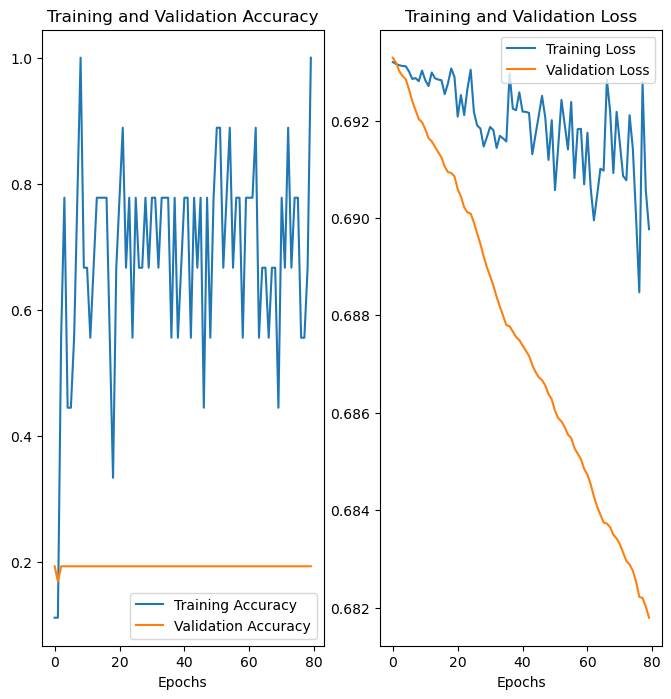

In [18]:
import matplotlib.pyplot as plt
epochs= 80
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epochs')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.show()

In [20]:
#resnet
import datetime

In [21]:
# Creating a callback function to save model's metrics
def create_tensorboard_callback(dir_name, experiment_name):
    log_dir= dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
     )
    print(f"Saving TensorBoard log files to: {log_dir}")
    return tensorboard_callback

In [22]:
tl_model = tf.keras.applications.ResNet50V2(include_top=False)
tl_model.trainable = False
inputs = layers.Input(shape=(200, 200, 3), name='input_layer')
x = tl_model(inputs)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_2= tf.keras.Model(inputs, outputs)

In [23]:
model_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 200, 200, 3)]     0         
                                                                 
 resnet50v2 (Functional)     (None, None, None, 2048   23564800  
                             )                                   
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_2 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 23566849 (89.90 MB)
Trainable params: 2049 (8.00 KB)
Non-trainable params: 23564800 (89.89 MB)
_________________________________________________________________


In [24]:
model_2.compile(optimizer='adam',
loss = 'binary_crossentropy',
              metrics=['accuracy'])


In [25]:
epochs=80
history_2 = model_2.fit(
  train_dataset,
  validation_data=validation_dataset,
  epochs=epochs
)

Epoch 1/80
14/14 [==============================] - 24s 1s/step - loss: 0.5228 - accuracy: 0.7143 - val_loss: -4.6760 - val_accuracy: 0.1928
Epoch 2/80
14/14 [==============================] - 16s 1s/step - loss: 0.3251 - accuracy: 0.7143 - val_loss: -4.7340 - val_accuracy: 0.1928
Epoch 3/80
14/14 [==============================] - 16s 1s/step - loss: 0.2742 - accuracy: 0.7143 - val_loss: -4.1786 - val_accuracy: 0.1928
Epoch 4/80
14/14 [==============================] - 17s 1s/step - loss: 0.2223 - accuracy: 0.7143 - val_loss: -3.2995 - val_accuracy: 0.1928
Epoch 5/80
14/14 [==============================] - 17s 1s/step - loss: 0.1854 - accuracy: 0.7143 - val_loss: -2.9568 - val_accuracy: 0.1928
Epoch 6/80
14/14 [==============================] - 16s 1s/step - loss: 0.1370 - accuracy: 0.7143 - val_loss: -3.4076 - val_accuracy: 0.1928
Epoch 7/80
14/14 [==============================] - 16s 1s/step - loss: 0.0942 - accuracy: 0.7143 - val_loss: -3.4672 - val_accuracy: 0.1928
Epoch 8/80
14

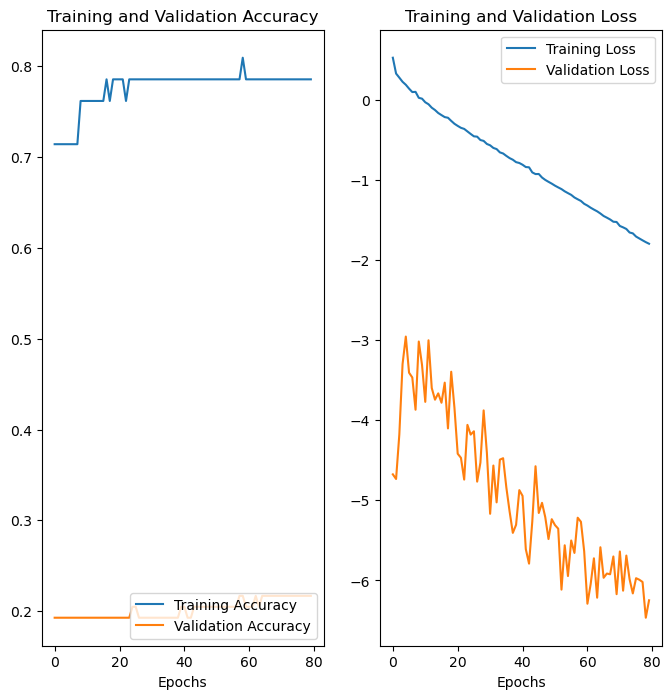

In [26]:
acc = history_2.history['accuracy']
val_acc = history_2.history['val_accuracy']

loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epochs')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')

plt.show()

In [27]:
val_loss, val_acc = model_2.evaluate(validation_dataset, verbose = 2)

28/28 - 6s - loss: -6.2478e+00 - accuracy: 0.2169 - 6s/epoch - 217ms/step


In [28]:
## Loading VGG16 model
from keras.applications import VGG16
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(200,200,3))
base_model.trainable = False ## Not trainable weights

In [29]:
flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(1, activation='sigmoid')


model_3 = models.Sequential([
    
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [30]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [31]:
epochs=80
history_3 = model_3.fit(
  train_dataset,
  validation_data= validation_dataset,
  epochs=epochs
)

Epoch 1/80
14/14 [==============================] - 21s 1s/step - loss: 0.4107 - accuracy: 0.6905 - val_loss: -2.5061 - val_accuracy: 0.1928
Epoch 2/80
14/14 [==============================] - 20s 1s/step - loss: 0.1829 - accuracy: 0.7381 - val_loss: -1.8721 - val_accuracy: 0.1928
Epoch 3/80
14/14 [==============================] - 19s 1s/step - loss: -0.0288 - accuracy: 0.7381 - val_loss: -0.6326 - val_accuracy: 0.1928
Epoch 4/80
14/14 [==============================] - 19s 1s/step - loss: -0.3052 - accuracy: 0.8095 - val_loss: -4.5016 - val_accuracy: 0.1928
Epoch 5/80
14/14 [==============================] - 19s 1s/step - loss: -0.4735 - accuracy: 0.7857 - val_loss: 0.7589 - val_accuracy: 0.1928
Epoch 6/80
14/14 [==============================] - 19s 1s/step - loss: -0.6420 - accuracy: 0.8095 - val_loss: -4.3045 - val_accuracy: 0.2048
Epoch 7/80
14/14 [==============================] - 19s 1s/step - loss: -1.0363 - accuracy: 0.8810 - val_loss: -4.7478 - val_accuracy: 0.2048
Epoch 8/8

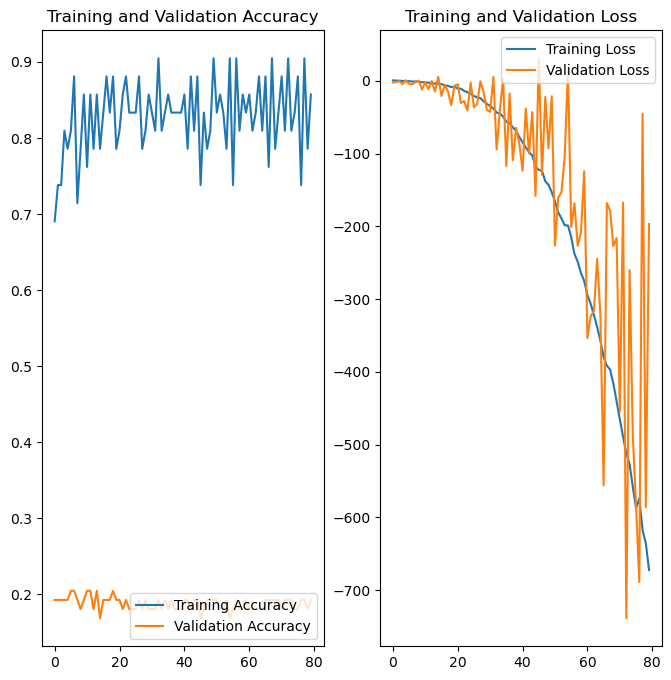

In [32]:
acc = history_3.history['accuracy']
val_acc = history_3.history['val_accuracy']

loss = history_3.history['loss']
val_loss = history_3.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [33]:
val_loss, val_acc = model_3.evaluate(validation_dataset, verbose = 2)

28/28 - 12s - loss: -1.9691e+02 - accuracy: 0.1928 - 12s/epoch - 443ms/step


In [34]:
#Alexnet
import tensorflow as tf
from tensorflow import keras
model_4 =model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(200,200,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])


In [35]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 48, 48, 96)        34944     
                                                                 
 batch_normalization (Batch  (None, 48, 48, 96)        384       
 Normalization)                                                  
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 23, 23, 96)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 23, 23, 256)       614656    
                                                                 
 batch_normalization_1 (Bat  (None, 23, 23, 256)       1024      
 chNormalization)                                                
                                                      

In [36]:
model_4.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])


history_4 = model_4.fit(
  train_dataset,
  validation_data= validation_dataset,
  epochs=epochs
)

Epoch 1/80
14/14 [==============================] - 9s 541ms/step - loss: 0.2851 - accuracy: 0.6905 - val_loss: 3.2530 - val_accuracy: 0.1928
Epoch 2/80
14/14 [==============================] - 7s 530ms/step - loss: 0.2857 - accuracy: 0.7143 - val_loss: 3.2530 - val_accuracy: 0.1928
Epoch 3/80
14/14 [==============================] - 7s 486ms/step - loss: 0.2857 - accuracy: 0.7143 - val_loss: 3.2530 - val_accuracy: 0.1928
Epoch 4/80
14/14 [==============================] - 7s 504ms/step - loss: 0.2857 - accuracy: 0.7143 - val_loss: 3.2530 - val_accuracy: 0.1928
Epoch 5/80
14/14 [==============================] - 7s 521ms/step - loss: 0.2857 - accuracy: 0.7143 - val_loss: 3.2530 - val_accuracy: 0.1928
Epoch 6/80
14/14 [==============================] - 7s 513ms/step - loss: 0.2857 - accuracy: 0.7143 - val_loss: 3.2530 - val_accuracy: 0.1928
Epoch 7/80
14/14 [==============================] - 7s 507ms/step - loss: 0.2857 - accuracy: 0.7143 - val_loss: 3.2530 - val_accuracy: 0.1928
Epoch 

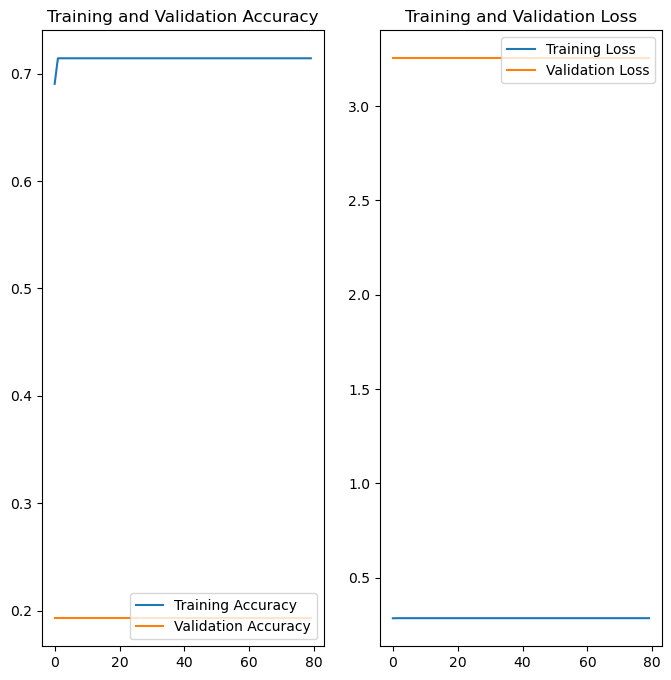

In [37]:
acc = history_4.history['accuracy']
val_acc = history_4.history['val_accuracy']

loss = history_4.history['loss']
val_loss = history_4.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [38]:
val_loss, val_acc = model_4.evaluate(validation_dataset, verbose = 2)

28/28 - 2s - loss: 3.2530 - accuracy: 0.1928 - 2s/epoch - 80ms/step


SyntaxError: invalid syntax (1016415176.py, line 1)